# Load libraries and data

In [252]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Download `Confirmed positive cases of COVID-19 in Ontario`, all historic data

In [ ]:
if not os.path.exists('conposcovidloc.csv'):
    import requests
    url = "https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv"
    filename = 'conposcovidloc.csv'
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    response = requests.get(url, headers=headers)

    with open(filename, mode = 'wb') as file:
        file.write(response.content)

In [ ]:
filename = 'conposcovidloc.csv'
all_cases = pd.read_csv(filename)

# Data Glimpse

In [ ]:
all_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667957 entries, 0 to 1667956
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Row_ID                     1667957 non-null  int64  
 1   Accurate_Episode_Date      1667957 non-null  object 
 2   Case_Reported_Date         1667957 non-null  object 
 3   Test_Reported_Date         1616748 non-null  object 
 4   Specimen_Date              1656185 non-null  object 
 5   Age_Group                  1667957 non-null  object 
 6   Client_Gender              1667957 non-null  object 
 7   Outcome1                   17192 non-null    object 
 8   Reporting_PHU_ID           1667957 non-null  int64  
 9   Reporting_PHU              1667957 non-null  object 
 10  Reporting_PHU_Address      1667957 non-null  object 
 11  Reporting_PHU_City         1667957 non-null  object 
 12  Reporting_PHU_Postal_Code  1667957 non-null  object 
 13  Reporting_PH

# Gender and age group

## Case count proportions

In [ ]:
# TODO: is there an easier way to reorder categoricals like factor in R?
all_cases['Age_Group'] = all_cases['Age_Group']\
    .astype('category')\
    .cat.reorder_categories(
        [
            '<20',
            '20s',
            '30s',
            '40s',
            '50s',
            '60s',
            '70s',
            '80s',
            '90+',
            'UNKNOWN'
        ]
    )

# Reorder gender category for table
all_cases["Client_Gender"] = all_cases['Client_Gender']\
    .astype('category')\
    .cat.reorder_categories(
        ['FEMALE', 'MALE', 'UNSPECIFIED', 'GENDER DIVERSE']
    )

# Get counts in proportions by age groups and gender
gender_age_grps = all_cases\
    .groupby(['Age_Group'])['Client_Gender']\
    .value_counts(normalize=True)\
    .to_frame(name='prop')\
    .reset_index()


# Pivot wider to table and format numerics to percents
gender_age_grps\
    .pivot(
        index="Age_Group",
        columns="Client_Gender",
        values="prop"
    )\
    .style.format({
        "FEMALE": "{:.2%}",
        "MALE": "{:.2%}",
        "UNSPECIFIED": "{:.2%}",
        "GENDER DIVERSE": "{:.2%}",
    })

C:\Users\mkuo\AppData\Local\Temp\ipykernel_25444\289128994.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Age_Group'])['Client_Gender']\


Client_Gender,FEMALE,MALE,UNSPECIFIED,GENDER DIVERSE
Age_Group,,,,
<20,48.67%,50.09%,1.24%,0.00%
20s,55.27%,43.89%,0.84%,0.00%
30s,56.77%,42.61%,0.62%,0.00%
40s,58.45%,40.98%,0.57%,0.00%
50s,56.51%,42.97%,0.52%,0.00%
60s,51.45%,48.09%,0.46%,0.00%
70s,49.72%,49.95%,0.33%,0.00%
80s,57.63%,42.11%,0.26%,0.00%
90+,69.45%,30.28%,0.27%,0.00%


Text(0.5, 0, 'Age Groups')

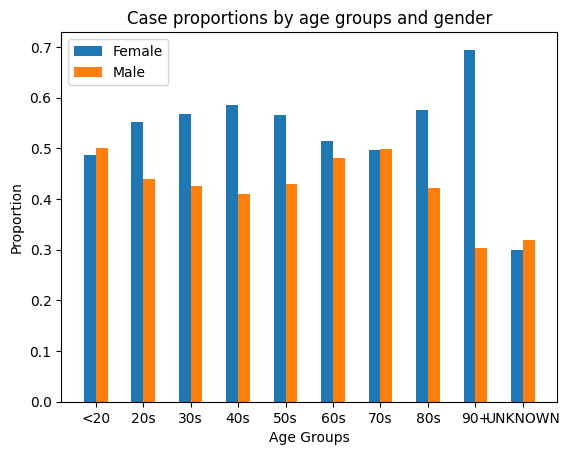

In [ ]:
female = gender_age_grps[gender_age_grps.Client_Gender == "FEMALE"]\
            .sort_values('Age_Group')
male   = gender_age_grps[gender_age_grps.Client_Gender == "MALE"]\
            .sort_values('Age_Group')

x_indexes = np.arange(len(female))
width = 0.25

plt.bar(x_indexes - width / 2, female["prop"], width = width, label="Female")
plt.bar(x_indexes + width / 2, male["prop"],   width = width, label="Male")

plt.legend()

plt.xticks(ticks = x_indexes, labels = female['Age_Group'])

plt.title('Case proportions by age groups and gender')
plt.ylabel('Proportion')
plt.xlabel('Age Groups')


In [ ]:
all_cases['Outcome1'].fillna('SURVIVED', inplace=True)

## Mortality

In [ ]:
survival_prop = all_cases\
    .groupby(['Age_Group', 'Client_Gender'])['Outcome1']\
    .value_counts(normalize=True)\
    .to_frame(name='prop')\
    .reset_index()

survival_prop = survival_prop.loc[survival_prop.Outcome1 == 'FATAL']

survival_prop\
    .pivot(
        index="Age_Group",
        columns="Client_Gender",
        values="prop"
    )\
    .style.format({
        "FEMALE": "{:.2%}",
        "MALE": "{:.2%}",
        "UNSPECIFIED": "{:.2%}",
        "GENDER DIVERSE": "{:.2%}",
    })


C:\Users\mkuo\AppData\Local\Temp\ipykernel_25444\2734174232.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Age_Group', 'Client_Gender'])['Outcome1']\


Client_Gender,FEMALE,MALE,UNSPECIFIED,GENDER DIVERSE
Age_Group,,,,
<20,0.01%,0.01%,0.00%,0.00%
20s,0.01%,0.02%,0.08%,0.00%
30s,0.02%,0.07%,0.00%,0.00%
40s,0.07%,0.17%,0.08%,0.00%
50s,0.24%,0.53%,0.18%,0.00%
60s,0.90%,1.75%,0.45%,0.00%
70s,2.68%,4.20%,1.76%,0.00%
80s,4.66%,7.39%,8.08%,0.00%
90+,6.93%,10.15%,12.50%,0.00%


Text(0.5, 0, 'Age Groups')

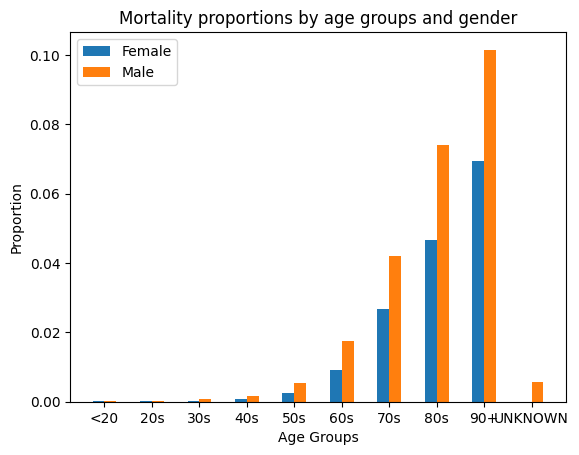

In [ ]:
female = survival_prop[survival_prop.Client_Gender == "FEMALE"]\
            .sort_values('Age_Group')
male   = survival_prop[survival_prop.Client_Gender == "MALE"]\
            .sort_values('Age_Group')

x_indexes = np.arange(len(female))
width = 0.25

plt.bar(x_indexes - width / 2, female["prop"], width = width, label="Female")
plt.bar(x_indexes + width / 2, male["prop"],   width = width, label="Male")

plt.legend()

plt.xticks(ticks = x_indexes, labels = female['Age_Group'])

plt.title('Mortality proportions by age groups and gender')
plt.ylabel('Proportion')
plt.xlabel('Age Groups')